# Cluster and Plot Predictions

In [1]:
from keras.src.saving import load_model
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\measuring-quality-of-life-gauteng


In [2]:

import geopandas as gpd
import pandas as pd
import tensorflow as tf
from dvc.api import params_show

label = params_show()["train"]["label"]
label

'qol_index'

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [4]:
model = load_model("outputs/model/final.h5")

In [5]:
model.summary()

Model: "ResNet50V2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [25]:
from utils.load_processed_data import load_dataset

training_data = load_dataset('train')
training_data

,level_0,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry
0,0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.32296, 27.24609 -26.32296, 27.24609 -26.33281, 27.25708 -26.33281))"
1,1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.35250, 27.24609 -26.35250, 27.24609 -26.36234, 27.25708 -26.36234))"
2,2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.36234, 27.24609 -26.36234, 27.24609 -26.37219, 27.25708 -26.37219))"
3,3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.37219, 27.24609 -26.37219, 27.24609 -26.38203, 27.25708 -26.38203))"
4,4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.38203, 27.24609 -26.38203, 27.24609 -26.39187, 27.25708 -26.39187))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.05678, 28.28979 -26.05678, 28.28979 -26.06665, 28.30078 -26.06665))"
16378,21858,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.06665, 28.28979 -26.06665, 28.28979 -26.07652, 28.30078 -26.07652))"
16379,21859,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.07652, 28.28979 -26.07652, 28.28979 -26.08639, 28.30078 -26.08639))"
16380,21860,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.08639, 28.28979 -26.08639, 28.28979 -26.09625, 28.30078 -26.09625))"


In [26]:
training_data.shape[0]

16382

In [27]:
from utils.keras_data_format import create_generator

train_generator = create_generator(training_data, label)
train_generator

Found 16382 validated image filenames.


In [28]:
y_predictions_v2 = model.predict(train_generator)
y_predictions_v2

512/512 [==============================] - 169s 330ms/step


array([[62.370953],
       [55.359104],
       [55.372547],
       ...,
       [65.35515 ],
       [71.249245],
       [49.97248 ]], dtype=float32)

In [29]:
training_data["predicted"] = y_predictions_v2
training_data["actual"] = training_data[label]
training_data

,level_0,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,predicted,actual
0,0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.32296, 27.24609 -26.32296, 27.24609 -26.33281, 27.25708 -26.33281))",62.370953,62.041629
1,1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.35250, 27.24609 -26.35250, 27.24609 -26.36234, 27.25708 -26.36234))",55.359104,63.701792
2,2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.36234, 27.24609 -26.36234, 27.24609 -26.37219, 27.25708 -26.37219))",55.372547,63.701792
3,3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.37219, 27.24609 -26.37219, 27.24609 -26.38203, 27.25708 -26.38203))",62.751476,63.701792
4,4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.38203, 27.24609 -26.38203, 27.24609 -26.39187, 27.25708 -26.39187))",57.808983,63.701792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.05678, 28.28979 -26.05678, 28.28979 -26.06665, 28.30078 -26.06665))",71.752899,61.696010
16378,21858,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.06665, 28.28979 -26.06665, 28.28979 -26.07652, 28.30078 -26.07652))",52.818050,61.696010
16379,21859,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.07652, 28.28979 -26.07652, 28.28979 -26.08639, 28.30078 -26.08639))",65.355148,61.696010
16380,21860,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.08639, 28.28979 -26.08639, 28.28979 -26.09625, 28.30078 -26.09625))",71.249245,61.696010


In [30]:
training_data[training_data["ward_code"] == '79800070']

,level_0,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,predicted,actual
2501,3603,3603,2018-04-1182-869_10_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.89429 -26.19488, 27.89429 -26.18502, 27.88330 -26.18502, 27.88330 -26.19488, 27.89429 -26.19488))",56.338974,71.823778
2502,3604,3604,2018-04-1182-869_11_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.90527 -26.19488, 27.90527 -26.18502, 27.89429 -26.18502, 27.89429 -26.19488, 27.90527 -26.19488))",55.324989,71.823778
2503,3605,3605,2018-04-1182-869_11_08.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.90527 -26.20473, 27.90527 -26.19488, 27.89429 -26.19488, 27.89429 -26.20473, 27.90527 -26.20473))",57.753967,71.823778
2505,3607,3607,2018-04-1182-869_12_05.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.17516, 27.91626 -26.16530, 27.90527 -26.16530, 27.90527 -26.17516, 27.91626 -26.17516))",58.329014,71.823778
2506,3608,3608,2018-04-1182-869_12_06.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.18502, 27.91626 -26.17516, 27.90527 -26.17516, 27.90527 -26.18502, 27.91626 -26.18502))",55.656269,71.823778
2507,3609,3609,2018-04-1182-869_12_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.19488, 27.91626 -26.18502, 27.90527 -26.18502, 27.90527 -26.19488, 27.91626 -26.19488))",58.417149,71.823778
2508,3610,3610,2018-04-1182-869_12_08.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.91626 -26.20473, 27.91626 -26.19488, 27.90527 -26.19488, 27.90527 -26.20473, 27.91626 -26.20473))",51.695000,71.823778
2512,3614,3614,2018-04-1182-869_13_05.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.17516, 27.92725 -26.16530, 27.91626 -26.16530, 27.91626 -26.17516, 27.92725 -26.17516))",55.607311,71.823778
2513,3615,3615,2018-04-1182-869_13_06.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.18502, 27.92725 -26.17516, 27.91626 -26.17516, 27.91626 -26.18502, 27.92725 -26.18502))",55.582134,71.823778
2514,3616,3616,2018-04-1182-869_13_07.tiff,2018,79800070,9.443560,5.815834,6.012608,6.911239,7.879661,5.822278,6.968772,71.823778,train,"POLYGON ((27.92725 -26.19488, 27.92725 -26.18502, 27.91626 -26.18502, 27.91626 -26.19488, 27.92725 -26.19488))",53.522266,71.823778


In [31]:
# this is why I need year :')
grouped_data = training_data[['ward_code', 'year', "actual", "predicted"]].groupby(['ward_code', 'year'],
                                                                                   as_index=False).mean()
grouped_data

,ward_code,year,actual,predicted
0,74201001,2018,75.001447,57.893120
1,74201001,2021,68.369627,57.886566
2,74201004,2018,69.295152,58.282787
3,74201004,2021,68.663389,58.520863
4,74201005,2018,70.136221,57.009636
...,...,...,...,...
413,79900104,2021,57.629835,58.168301
414,79900105,2018,56.324795,57.737354
415,79900105,2021,50.805601,57.287868
416,79900107,2018,55.191789,58.797867


In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

def plot_actual_vs_predicted(df: pd.DataFrame, year: str):
    # Actual vs predicted
    y_actual = df[df["year"] == year]["actual"]
    y_pred = df[df["year"] == year]["predicted"]
    plt.scatter(y_actual, y_pred, marker='o')

    # Trend line
    z = np.polyfit(y_actual, y_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_actual,p(y_actual),"r--")

    # R squared
    rscore = r2_score(y_actual, y_pred)
    print(rscore)
    rscore = f"r^2={round(rscore, 2)}"
    plt.gca().text(0.05, 0.05, rscore,transform=plt.gca().transAxes,
     fontsize=8, verticalalignment='top')

    # Labelling
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {year}')
    plt.show()

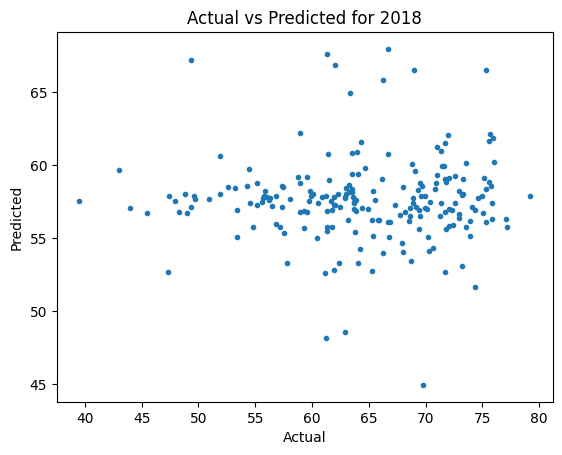

In [33]:
# Plot ward actual vs ward predicted on scatter for 2018
plot_actual_vs_predicted(grouped_data, '2018')

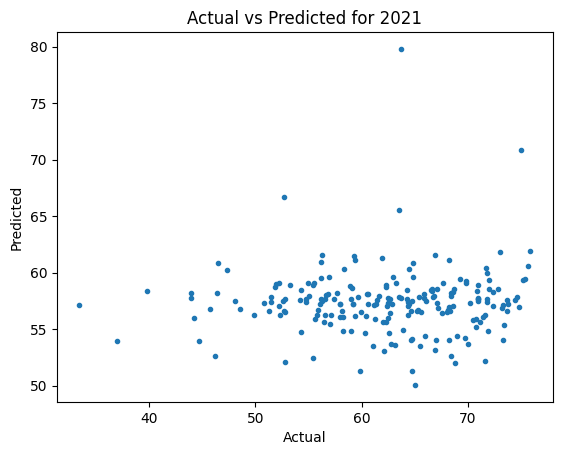

In [34]:
plot_actual_vs_predicted(grouped_data, '2021')

## Plot all predictions on map
This is quite difficult to visualise just because the tiles are being plotted and each tile in a region is different for predicted where as the actual is uniform. Going to try cluster now.

In [35]:
training_data

,level_0,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,predicted,actual
0,0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.32296, 27.24609 -26.32296, 27.24609 -26.33281, 27.25708 -26.33281))",62.370953,62.041629
1,1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.35250, 27.24609 -26.35250, 27.24609 -26.36234, 27.25708 -26.36234))",55.359104,63.701792
2,2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.36234, 27.24609 -26.36234, 27.24609 -26.37219, 27.25708 -26.37219))",55.372547,63.701792
3,3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.37219, 27.24609 -26.37219, 27.24609 -26.38203, 27.25708 -26.38203))",62.751476,63.701792
4,4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.38203, 27.24609 -26.38203, 27.24609 -26.39187, 27.25708 -26.39187))",57.808983,63.701792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.05678, 28.28979 -26.05678, 28.28979 -26.06665, 28.30078 -26.06665))",71.752899,61.696010
16378,21858,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.06665, 28.28979 -26.06665, 28.28979 -26.07652, 28.30078 -26.07652))",52.818050,61.696010
16379,21859,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.07652, 28.28979 -26.07652, 28.28979 -26.08639, 28.30078 -26.08639))",65.355148,61.696010
16380,21860,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.08639, 28.28979 -26.08639, 28.28979 -26.09625, 28.30078 -26.09625))",71.249245,61.696010


In [46]:
def map_actual_predicted_for_year(df: pd.DataFrame, year: str):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(64, 64))
    df[df["year"] == year].plot(ax=ax1, column='actual', figsize=(64, 64))
    df[df["year"] == year].plot(ax=ax2, column='predicted', figsize=(64, 64))
    

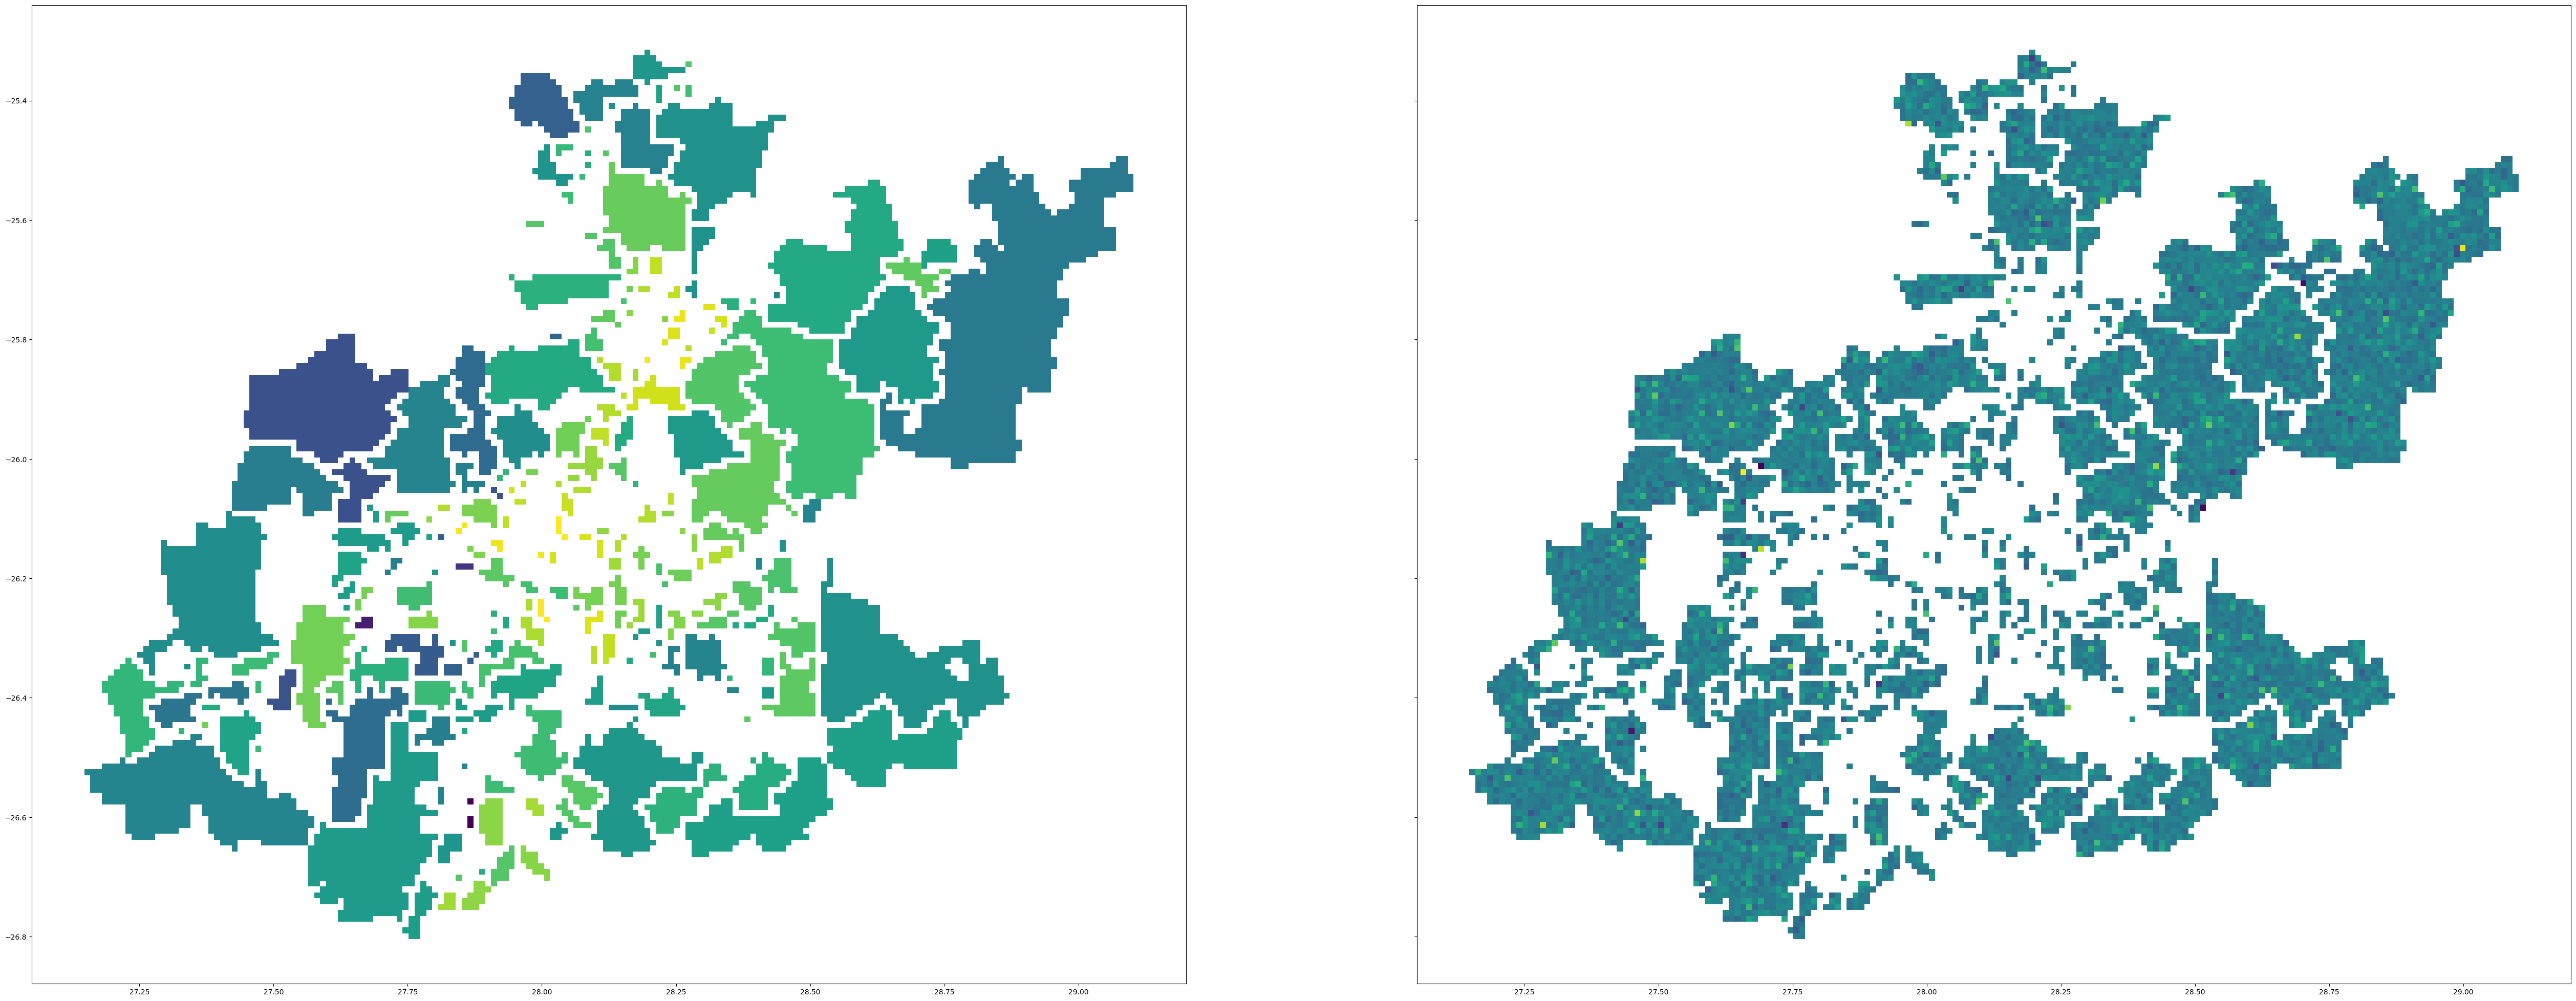

In [47]:
map_actual_predicted_for_year(training_data, '2021')

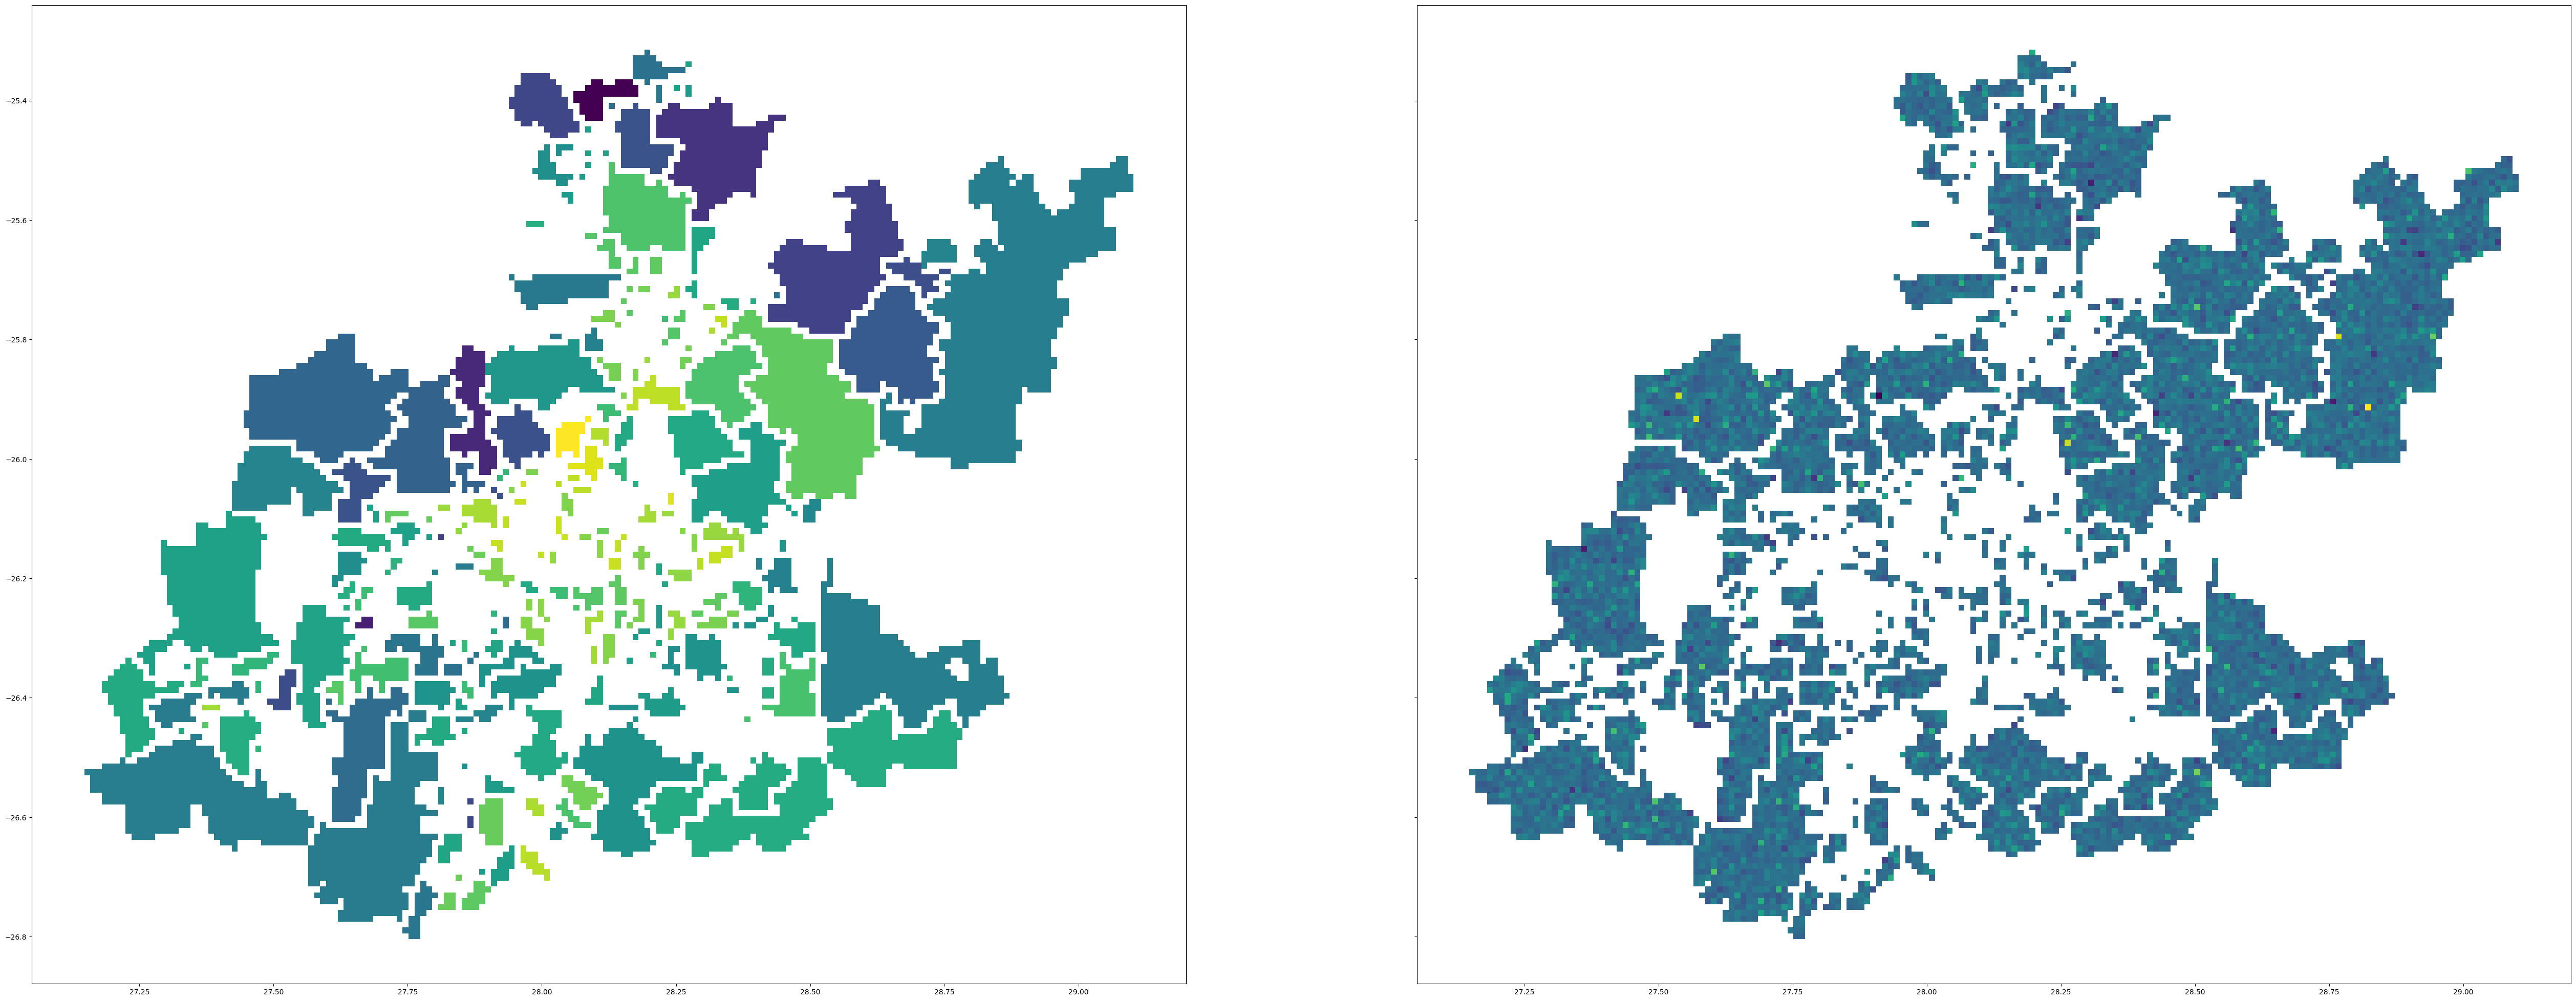

In [48]:
map_actual_predicted_for_year(training_data, '2018')

## Plot clustered predictions on map

In [49]:
def add_ward_geometry(clustered_df: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    years = clustered_df['year'].unique()
    merged_df = gpd.GeoDataFrame()
    for year in years:
        geojson_path = f"outputs/merged/{year}/gauteng-qol.geojson"
        gauteng_wards = gpd.read_file(geojson_path)
        gauteng_wards = gauteng_wards[['ward_code', 'geometry']]
        merged_df = pd.concat([
            merged_df,
            clustered_df[clustered_df['year'] == year].merge(gauteng_wards, how="inner", on="ward_code")
        ])
    return gpd.GeoDataFrame(merged_df)

In [50]:
geolocated_clusters = add_ward_geometry(clustered_df=grouped_data)
geolocated_clusters

ward_code  year     actual  predicted  \
0    74201001  2018  75.001447  57.893120   
1    74201004  2018  69.295152  58.282787   
2    74201005  2018  70.136221  57.009636   
3    74201007  2018  55.115010  57.261520   
4    74201008  2018  62.937255  57.840008   
..        ...   ...        ...        ...   
204  79900102  2021  56.190717  57.621792   
205  79900103  2021  65.439554  53.530819   
206  79900104  2021  57.629835  58.168301   
207  79900105  2021  50.805601  57.287868   
208  79900107  2021  47.347247  60.205917   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

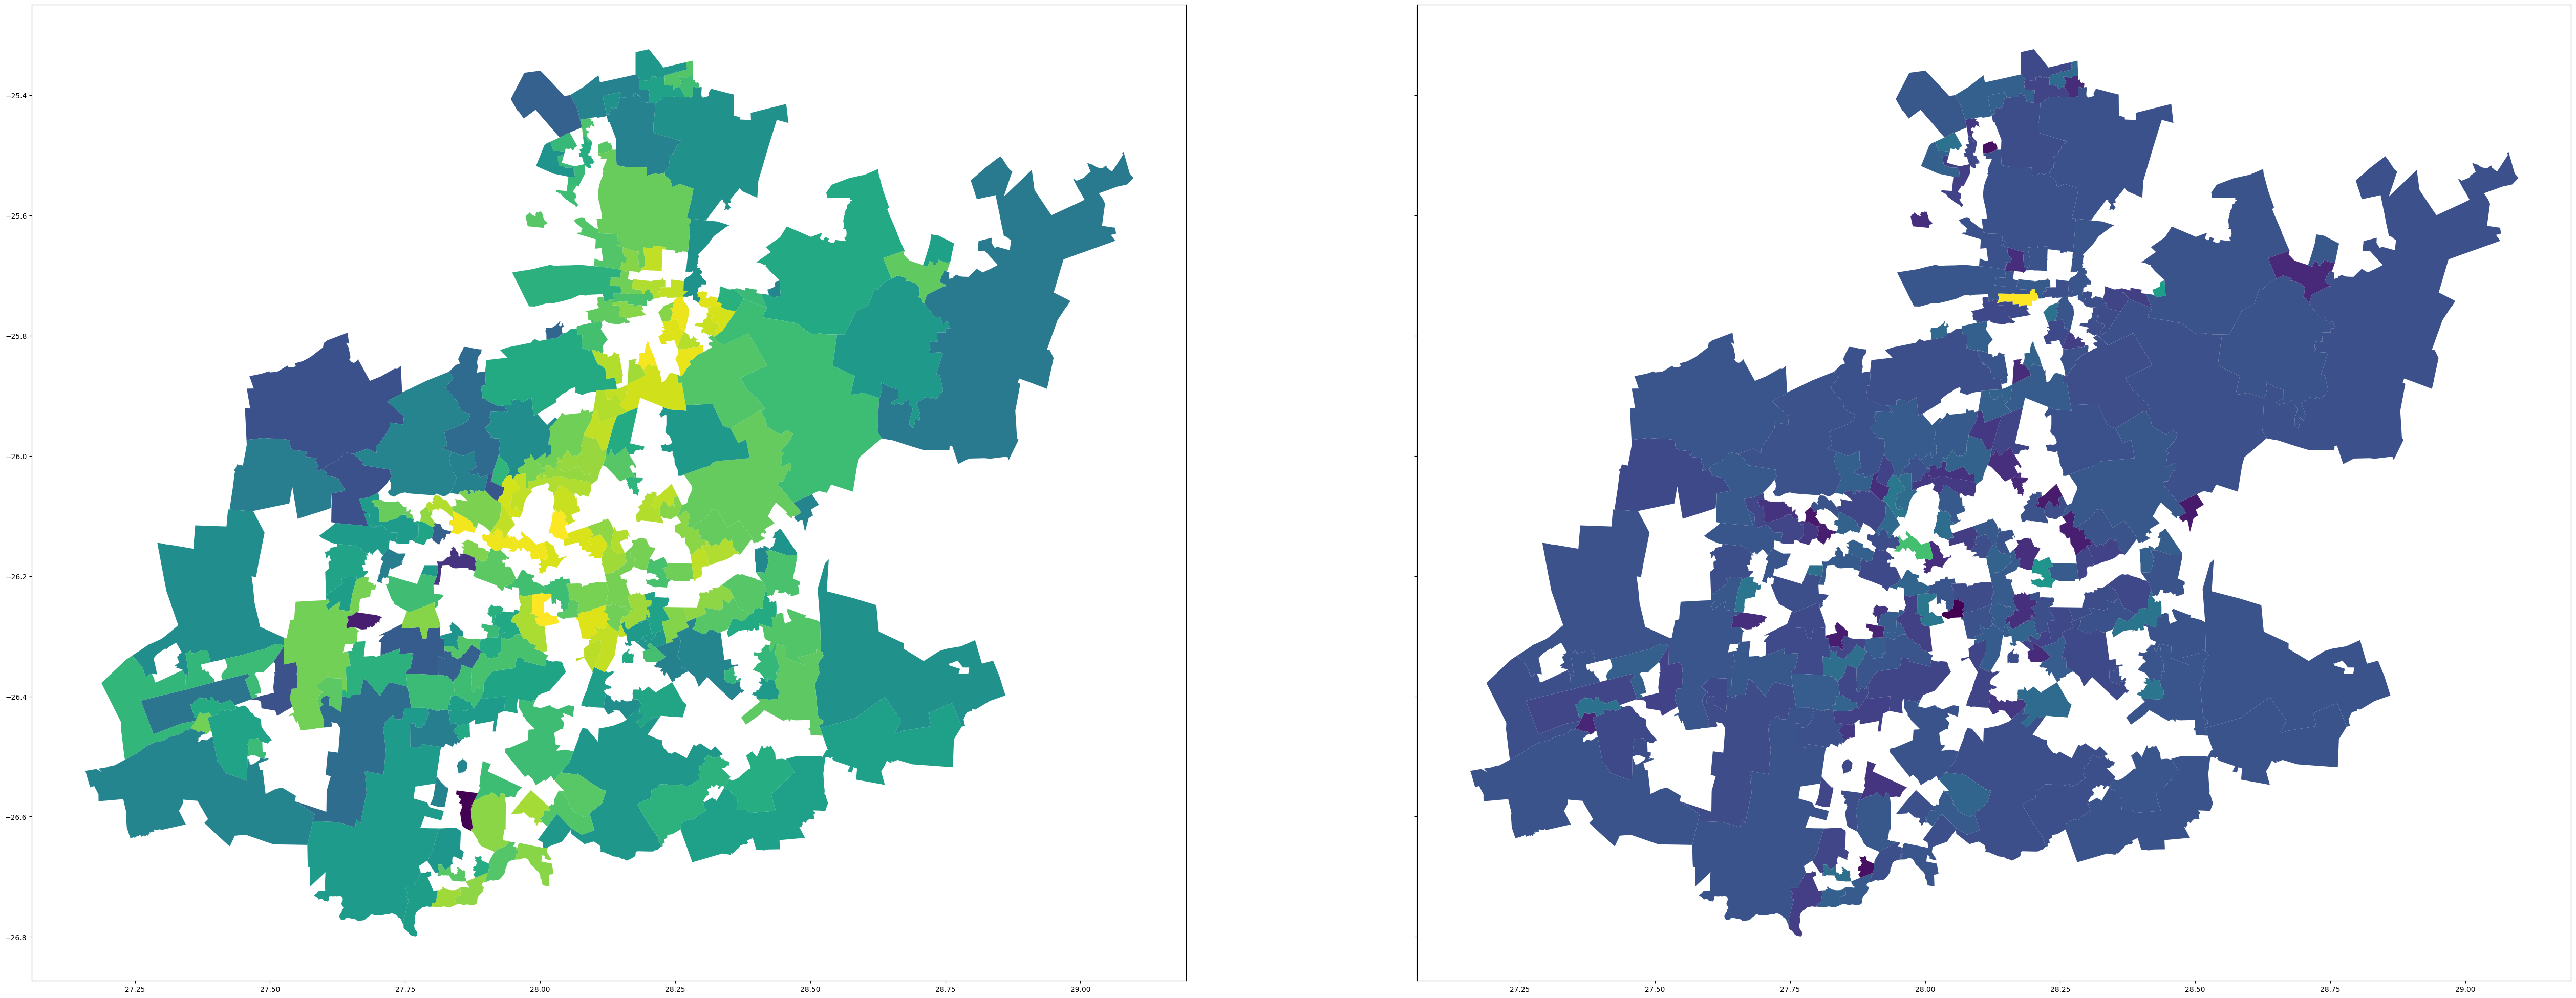

In [51]:
map_actual_predicted_for_year(geolocated_clusters, '2021')

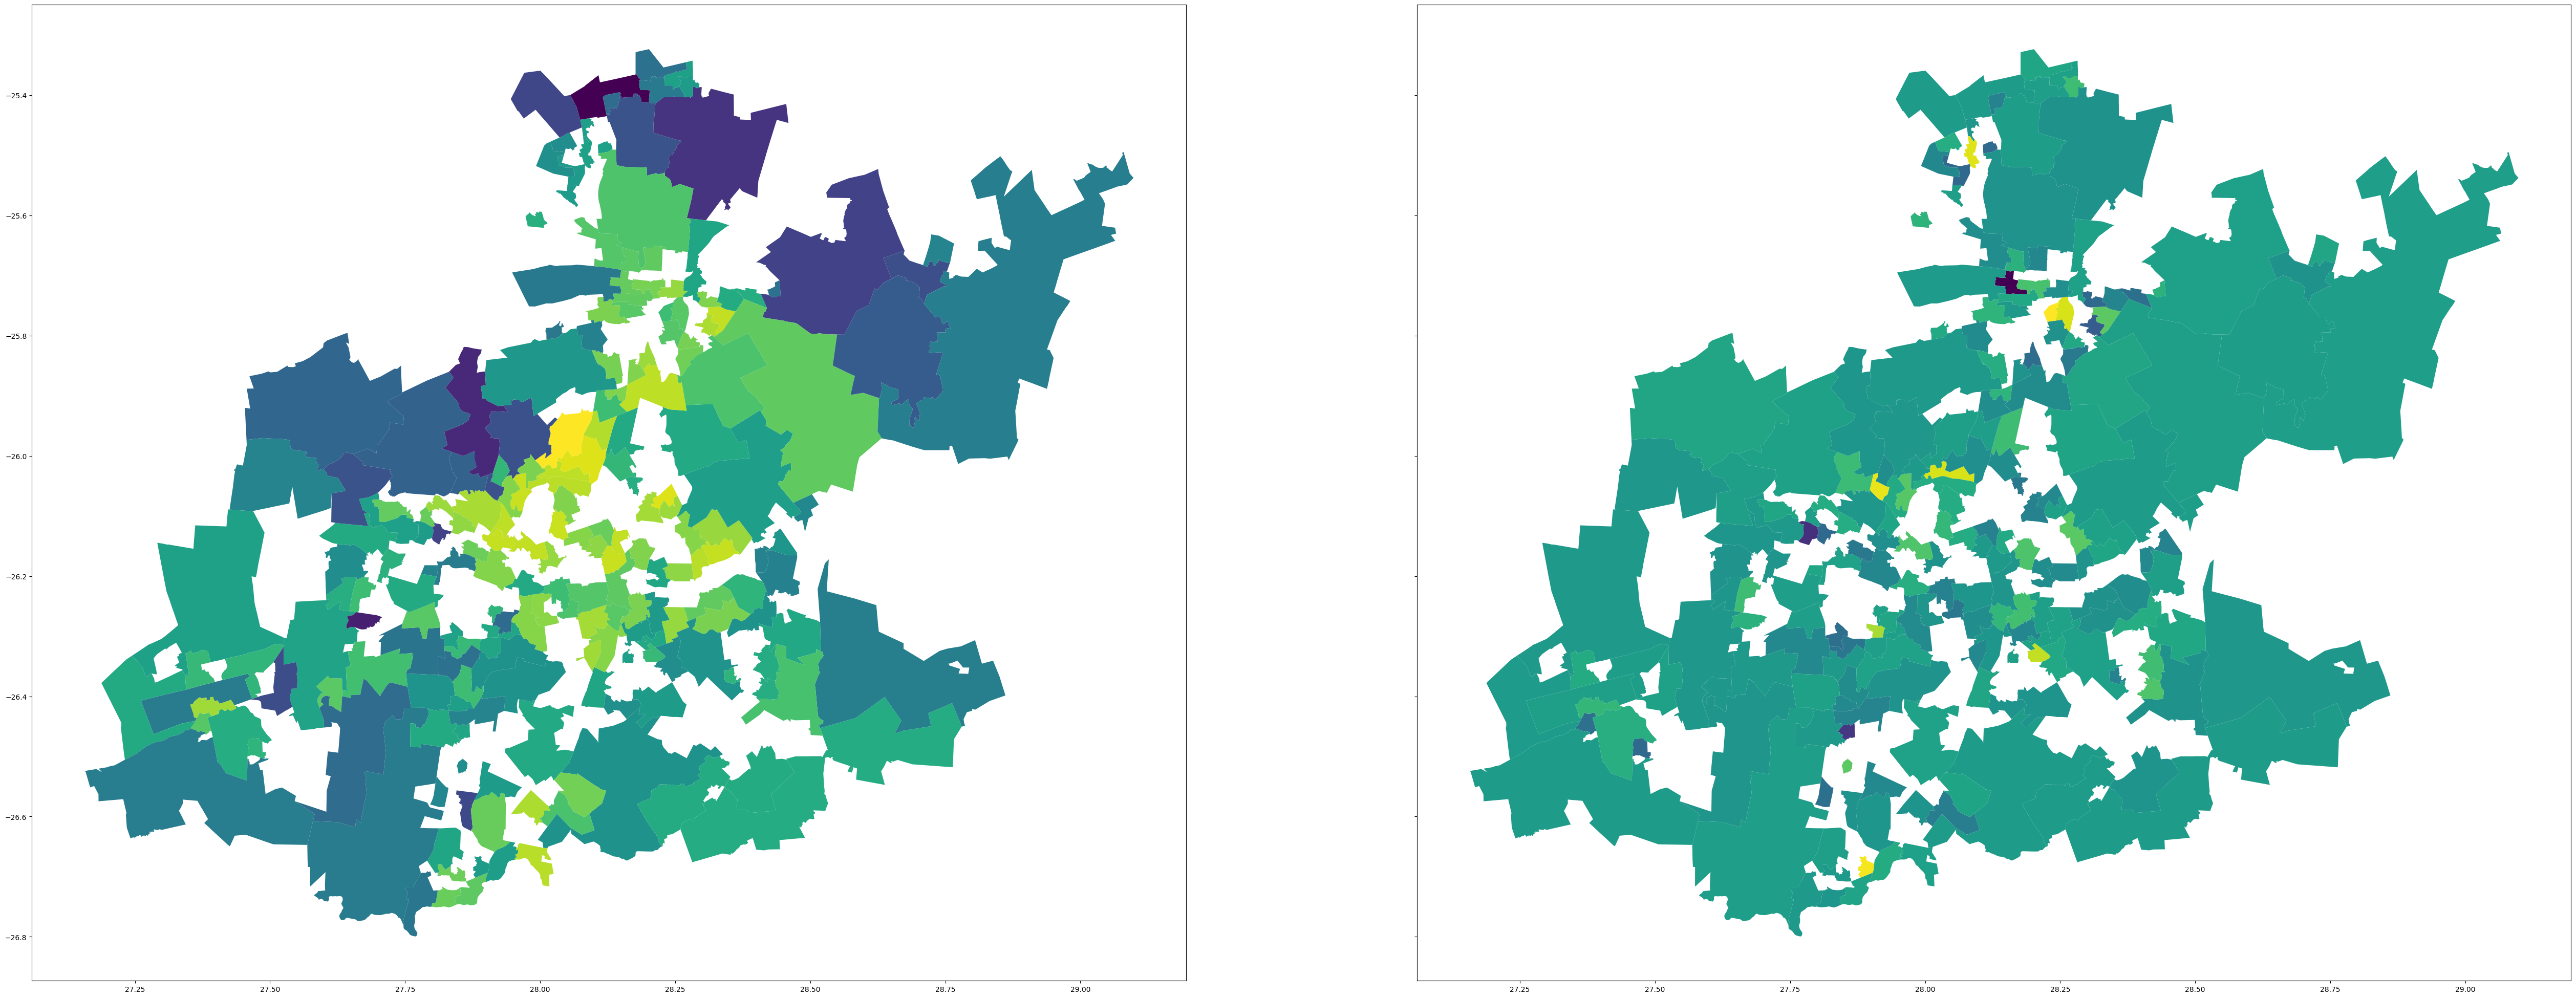

In [52]:
map_actual_predicted_for_year(geolocated_clusters, '2018')